## Определение тональности текстов отзывов на сайте [YELP](https://www.yelp.com/dataset) одномерной сверточной нейросетью

Учебный курс "[Программирование глубоких нейронных сетей на Python](https://openedu.ru/course/urfu/PYDNN/)".


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dl-urfu-yelp/sample_submission.csv
/kaggle/input/dl-urfu-yelp/train.csv
/kaggle/input/dl-urfu-yelp/test.csv
/kaggle/input/dl-urfu-yelp/train_label.csv


Загружаем данные

In [2]:
KAGGLE_PATH = '/kaggle/input/dl-urfu-yelp/'
x_train = pd.read_csv(KAGGLE_PATH + 'train.csv')
y_train = pd.read_csv(KAGGLE_PATH + 'train_label.csv', index_col=0)
x_test = pd.read_csv(KAGGLE_PATH + 'test.csv')
x_train.shape, y_train.shape, x_test.shape,

((560000, 1), (560000, 1), (4000, 1))

## Подготовка данных для обучения

### Токенизация текста

In [3]:
# извлекаем столбец с текстом
x_train = x_train.Review
x_test = x_test.Review

In [4]:
# указываем длину словаря, который мы будем использовать
num_words = 10000
# указываем длину последовательности, к которой приведем все тексты
max_review_len = 250
# создаем и обучаем токенизатор на тернировочных данных
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(x_train)
# применяем токенизатор к тренировочным и тестовым данным
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)
# приводим все вектора текстов к общей длине
x_train = pad_sequences(x_train, maxlen=max_review_len, padding='post')
x_test = pad_sequences(x_test, maxlen=max_review_len, padding='post')

## Создание нейронной сети

In [5]:
model = Sequential()
model.add(Embedding(num_words, 150, input_length=max_review_len))
model.add(LSTM(75, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [7]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=3,
                    batch_size=50,
                    validation_split=0.1)

Epoch 1/3
10080/10080 [==============================] - 4994s 495ms/step - loss: 0.3733 - accuracy: 0.8040 - val_loss: 0.1069 - val_accuracy: 0.9611
Epoch 2/3
10080/10080 [==============================] - 4985s 495ms/step - loss: 0.1178 - accuracy: 0.9557 - val_loss: 0.0920 - val_accuracy: 0.9655
Epoch 3/3
10080/10080 [==============================] - 5016s 498ms/step - loss: 0.0922 - accuracy: 0.9660 - val_loss: 0.0925 - val_accuracy: 0.9654


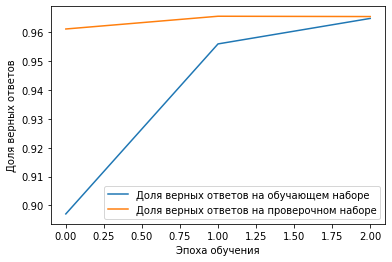

In [8]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Готовим данные для LeaderBoard

In [12]:
sample_submission = pd.read_csv(KAGGLE_PATH + 'sample_submission.csv', index_col='id')
sample_submission.label = model.predict_classes(x_test)
sample_submission.to_csv("sample_submission.csv")